# AG2 - Actividad Guiada 2
**Nombre**: Adrián García López

**Github**: https://github.com/adri14gl/Algoritmos_de_Optimizacion_VIU




In [1]:
import math
import numpy as np
import time

## 0.- Programación Dinámica. Viaje por el rio
Se omite la actividad "Viaje por el río" ya que ha sido ya reuelta en la **Actividad Guiada 1** y se continúa directamente con el Problema de Asignación de Tareas

## 1.- Problema de Asignacion de tarea

In [2]:
## Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [3]:
#Calculo del valor de una solucion parcial
## Dentro de S: S[i] representa el agente, i representa la tarea 
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]
  return VALOR

sol = (3,2,  )
print (f"Valor provisional para {sol}: {valor(sol,COSTES)}")

Valor provisional para (3, 2): 53


In [4]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  agentes_ocupados = set(S) ## Modificación introducida para buscar solo entre los agentes disponibles
      
  #Estimacion
  for i in range(len(S), len(COSTES)):
    costes_posibles = [COSTES[i][j] for j in range(len(COSTES)) if j not in agentes_ocupados]
    
    # Sumamos el mejor escenario posible (mínimo)
    if costes_posibles:
        VALOR += min(costes_posibles)
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  agentes_ocupados = set(S) ## Modificación introducida para buscar solo entre los agentes disponibles

  #Estimacion
  for i in range(len(S), len(COSTES)):
    costes_posibles = [COSTES[i][j] for j in range(len(COSTES)) if j not in agentes_ocupados]
    if costes_posibles:
        VALOR += max(costes_posibles)
  return VALOR
    
sol = (0,1)
print (f"Cota inferior para {sol}: {CI(sol,COSTES)}")
print (f"Cota superior para {sol}: {CS(sol, COSTES)}")


Cota inferior para (0, 1): 65
Cota superior para (0, 1): 77


In [5]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)})
  return HIJOS

nodo = (0,3,)
n = 4
print (f"Los hijos de {nodo} para n={n} son: {crear_hijos(nodo , n)}")

Los hijos de (0, 3) para n=4 son: [{'s': (0, 3, 1)}, {'s': (0, 3, 2)}]


In [6]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)))
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)})

  iteracion = 0

  while(len(NODOS) > 0): ## Mientras existan nodos candidatos, se mantiene el bucle
    iteracion +=1

    nodo_prometedor = [min(NODOS, key=lambda x:x['ci'])][0]['s'] ## Escogemos como nodo prometedor el que tiene la menor cota inferior
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)} for x in crear_hijos(nodo_prometedor, DIMENSION)]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION] ## Verificamos si están asignados todos los agentes
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup] #Si la cota inferior es menor que la solución actual, descartamos

    #Añadimos los hijos
    NODOS.extend(HIJOS) #Añadimos los hijos que aún son interesantes

    #Eliminamos el nodo ramificado
    NODOS = [x for x in NODOS if x['s'] != nodo_prometedor]
      
  return MEJOR_SOLUCION[0]['s'], iteracion


solucion, iteracion = ramificacion_y_poda(COSTES)
print("La solucion final es:" ,solucion , " en " , iteracion , " iteraciones" , "con valor", valor(solucion, COSTES) )

La solucion final es: (0, 2, 3, 1)  en  17  iteraciones con valor 61


## 2.1.- Análisis para mejorar nota: 

**¿Que complejidad tiene el algoritmo por fuerza bruta?**

Si desarrollamos un árbol donde a cada nivel, identificado con cada tarea, le asignamos un agente, nos encontramos ante un problema que crece factorialmente. El algoritmo por fuerza bruta tendrá que explorar el espacio de todas las posibles asignaciones, de orden n!, y llevar a cabo una suma de orden n para evaluar la solución, es decir, $$O(n \cdot n!)$$

**Generar matrices con valores aleatorios de mayores dimensiones (5,6,7,…) y ejecutar ambos algoritmos.**

In [7]:
# Algoritmo de fuerza bruta (generado a partir del prompt: "Programa la función fuerza_bruta que busca la mejor asignación de n agentes a n tareas
# por fuerza bruta, sin hacer uso de librerías de permutaciones")

def fuerza_bruta(matriz_costes):
    n = len(matriz_costes)
    mejor_coste = [float('inf')] # Usamos lista para que sea mutable en la recursión
    mejor_asignacion = [None]
    
    def backtrack(agente_actual, tareas_usadas, coste_acumulado, asignacion_actual):
        # Caso base: hemos asignado una tarea a todos los agentes (Hoja del árbol)
        if agente_actual == n:
            if coste_acumulado < mejor_coste[0]:
                mejor_coste[0] = coste_acumulado
                mejor_asignacion[0] = list(asignacion_actual)
            return

        # Intentar asignar cada tarea disponible al agente actual
        for tarea in range(n):
            if tarea not in tareas_usadas:
                # Marcar tarea como usada
                tareas_usadas.add(tarea)
                asignacion_actual.append(tarea)
                
                # Llamada recursiva para el siguiente agente
                backtrack(agente_actual + 1, 
                          tareas_usadas, 
                          coste_acumulado + matriz_costes[agente_actual][tarea], 
                          asignacion_actual)
                
                # Backtrack: desmarcar para probar otras combinaciones
                tareas_usadas.remove(tarea)
                asignacion_actual.pop()

    backtrack(0, set(), 0, [])
    return mejor_coste[0], mejor_asignacion[0]

In [8]:
for n in range (5, 11):
    print (f"Para tamaño del problema n={n}")

    #Generación de la matriz de costes
    costes = np.random.randint(10, 41, size=(n, n))
    
    #Fuerza Bruta
    start_fb = time.time()
    coste, asignacion = fuerza_bruta(costes)
    tiempo_fb = time.time() - start_fb

    #Ramificación y poda
    start_rp = time.time()
    solucion_rp, iteracion = ramificacion_y_poda(costes)
    tiempo_rp = time.time() - start_rp

    #Muestra de resultados
    print ("Fuerza bruta - Solución:", asignacion, "Coste:", coste, "Tiempo:", tiempo_fb)
    print ("Ramificación y poda: - Solución:", solucion_rp, "Coste:", valor(solucion_rp, costes), "Tiempo:", tiempo_rp, "\n")


Para tamaño del problema n=5
Fuerza bruta - Solución: [4, 3, 2, 1, 0] Coste: 73 Tiempo: 0.0
Ramificación y poda: - Solución: (4, 3, 2, 1, 0) Coste: 73 Tiempo: 0.0010085105895996094 

Para tamaño del problema n=6
Fuerza bruta - Solución: [5, 3, 1, 2, 0, 4] Coste: 103 Tiempo: 0.003079652786254883
Ramificación y poda: - Solución: (5, 3, 1, 2, 0, 4) Coste: 103 Tiempo: 0.0027511119842529297 

Para tamaño del problema n=7
Fuerza bruta - Solución: [0, 3, 1, 6, 4, 5, 2] Coste: 126 Tiempo: 0.018523216247558594
Ramificación y poda: - Solución: (0, 3, 1, 6, 4, 5, 2) Coste: 126 Tiempo: 0.002998828887939453 

Para tamaño del problema n=8
Fuerza bruta - Solución: [0, 5, 6, 1, 7, 3, 2, 4] Coste: 115 Tiempo: 0.15996980667114258
Ramificación y poda: - Solución: (0, 5, 6, 1, 7, 3, 2, 4) Coste: 115 Tiempo: 0.006998777389526367 

Para tamaño del problema n=9
Fuerza bruta - Solución: [5, 8, 7, 6, 2, 0, 3, 1, 4] Coste: 120 Tiempo: 1.4488022327423096
Ramificación y poda: - Solución: (5, 8, 7, 6, 2, 0, 3, 1, 

**Nota**: Al ejecutar la celda anterior se observaba que los resultados de ramificación y poda eran sistemáticamente inferiores a los arrojados por el algoritmo de fuerza bruta. Ello se debía a una deficiencia en las funciones de cálculo de cotas, las cuales no estaban explorando correctamente el espacio de soluciones disponibles. Se ha incluido una modificación en el código para corregirlo

**¿A partir de que dimensión el algoritmo por fuerza bruta deja de ser una opción?**

Para **n>8** el tiempo de ejecución ya comienza a irse por encima del segundo, **para n>10** ya por encima de los varios minutos y la mala complejidad que exhibe este algoritmo hace que sea razonable establecer el límite en el entorno de este valor, si bien se llega a resolver para n=11 tardando varios minutos, para mayores valores de entrada pierde el sentido abordar el problema siguiendo este enfoque.

In [ ]:
#Esta celda se muestra sin ejecutar dado que se ha usado para experimentar con los límites de la viabilidad del algoritmo

for n in range (5, 15):
    print (f"Para tamaño del problema n={n}")

    #Generación de la matriz de costes
    costes = np.random.randint(10, 41, size=(n, n))
    
    #Fuerza Bruta
    start_fb = time.time()
    coste, asignacion = fuerza_bruta(costes)
    tiempo_fb = time.time() - start_fb

    #Muestra de resultados
    print ("Fuerza bruta - Solución:", asignacion, "Coste:", coste, "Tiempo:", tiempo_fb)

**¿Hay algún valor de la dimensión a partir de la cual el algoritmo de ramificación y poda deja de ser una opción válida?**

Ejecutando el algoritmo de ramificación y poda para diferentes tamaños se observa que comienza a resultar problemático en el entorno de **n=15**. Puesto que la casuística concreta es importante en los algoritmos de ramificación y poda puesto que el número de operaciones es altamente dependiente de cómo se distribuyen las soluciones viables y descartables en el árbol de expansión, en ocasiones se llega a completar para n=16 o n=17, pero n=15 es el entorno en el cual el algoritmo comienza a mostrar serios problemas de rendimiento. 

In [ ]:
#Esta celda se muestra sin ejecutar dado que se ha usado para experimentar con los límites de la viabilidad del algoritmo

for n in range (10, 21):
    print (f"Para tamaño del problema n={n}")

    #Generación de la matriz de costes
    costes = np.random.randint(10, 41, size=(n, n))

    #Ramificación y poda
    start_rp = time.time()
    solucion_rp, iteracion = ramificacion_y_poda(costes)
    tiempo_rp = time.time() - start_rp

    #Muestra de resultados
    print ("Ramificación y poda: - Solución:", solucion_rp, "Coste:", valor(solucion_rp, costes), "Tiempo:", tiempo_rp, "\n")

## 2.- Descenso del gradiente

In [9]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [10]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

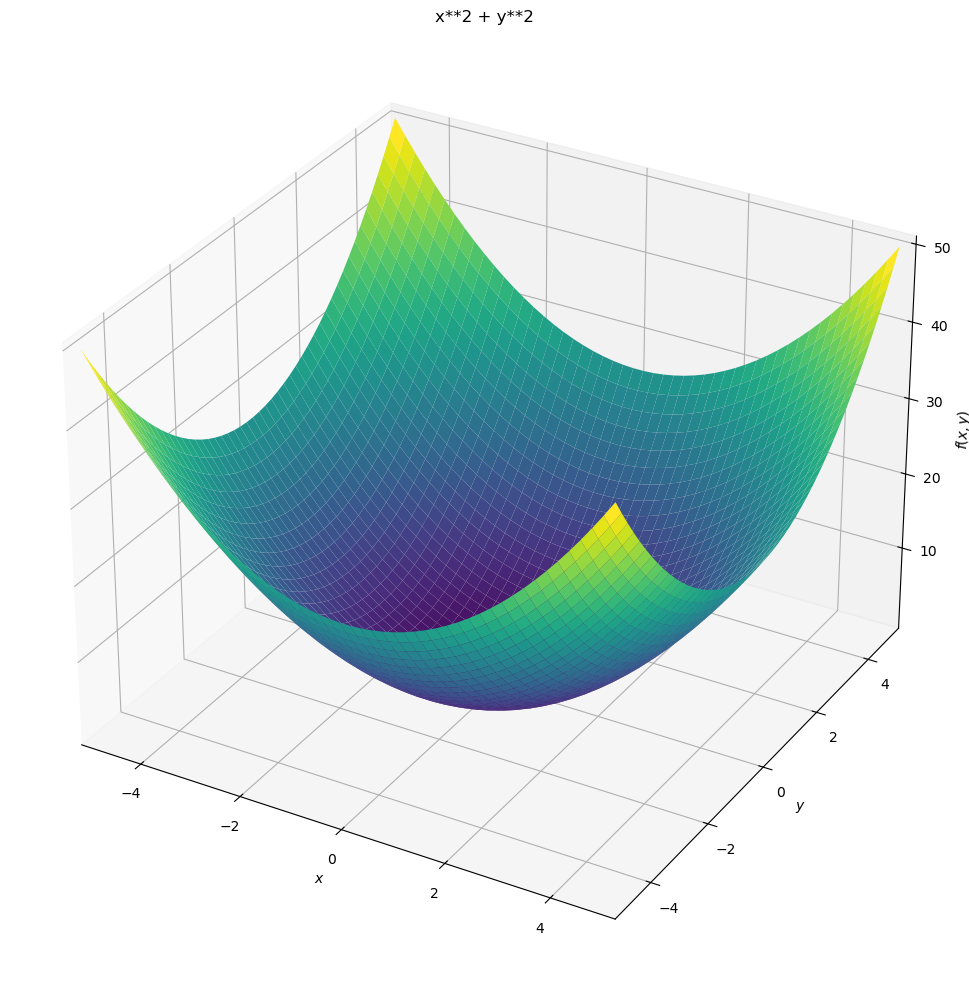

In [11]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

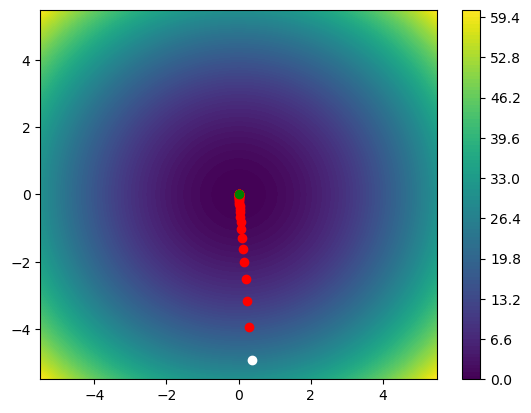

Solucion: [5.368913210721801e-06, -7.051422298259504e-05] 5.001080871903398e-09


In [12]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


## 2.1.- Práctica para mejorar nota

**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
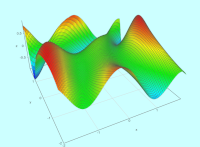


In [13]:
#Definimos la funcion y su gradiente

f_2= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )
df_2 = lambda X: [X[0]*math.cos(2*X[0]-math.exp(X[1])+1)*math.cos((X[0]**2)/2-(X[1]**2)/4+3)-2*math.sin(2*X[0]- math.exp(X[1])+1)*math.sin((X[0]**2)/2-(X[1]**2)/4+3),
               math.exp(X[1])*math.sin(-(X[0]**2)/2+(X[1]**2)/4-3)*math.sin(math.exp(X[1])-2*X[1]-1)-(X[0]*math.cos(-(X[0]**2)/2+(X[1]**2)/4-3)*math.cos(math.exp(X[1])-2*X[1]-1))/2]      #Definimos el gradiente


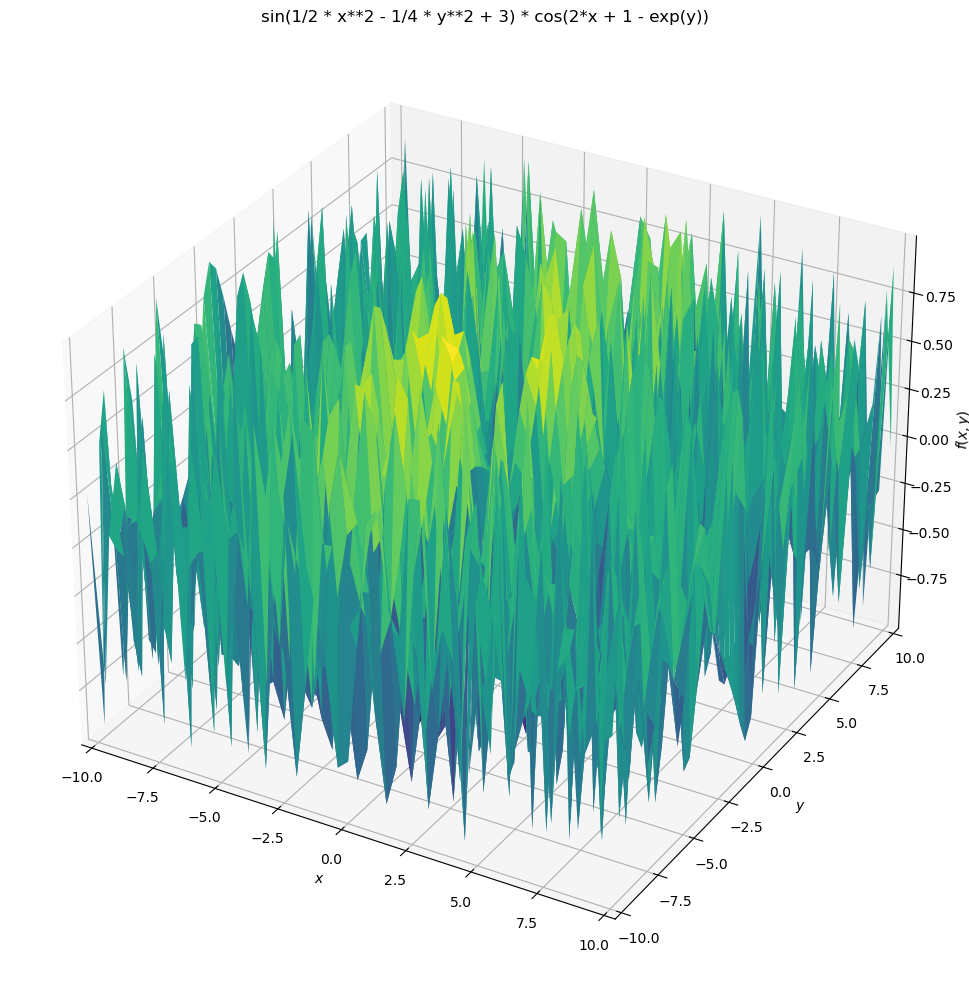

In [16]:
#Graficar usando sympy

from sympy import symbols, sin, cos, exp
x, y = symbols('x y')
plot3d(sin(1/2 * x**2 - 1/4 * y**2 + 3) * cos(2*x + 1 - exp(y)),
       (x,-10,10),(y,-10,10),
       title='sin(1/2 * x**2 - 1/4 * y**2 + 3) * cos(2*x + 1 - exp(y))',
       size=(10,10))

Puesto que se trata de una función altamente no convexa, llevamos a cabo ciertas modificaciones respecto al ejemplo anterior más sencillo:

* Aplicamos **multiarranque**, iniciando desde varios puntos diferentes para tratar de encontrar diferentes mínimos locales y compararlos
* Reducimos el valor de **Learning Rate** para evitar ir dando saltos entre las crestas de la función
* Aumentamos el **número de iteraciones** para aumentar las posibilidades de converger a un mínimo local


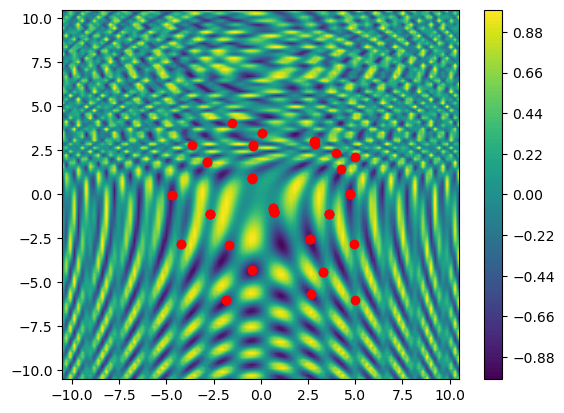

Mejores soluciones obtenidas:
1: Punto [2.64078091874756, -5.6758766628086645] con Valor -0.9999801582380746
2: Punto [4.718979647868063, 0.006569094873249977] con Valor -0.9999743808733051
3: Punto [4.71897964762641, 0.006569091974088845] con Valor -0.9999743808540987
4: Punto [-4.71897967336101, -0.006612532610107663] con Valor -0.9999743804683661
5: Punto [-4.718979667812584, -0.006612465098996275] con Valor -0.9999743800269817


In [17]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=10.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f_2([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

soluciones = []

n_puntos = 50 #Lanzamos muchos inicios diferentes para poder explorar extensivamente el espacio (-5,5) para ambas variables
for i in range (n_puntos):
    #Generamos un punto aleatorio inicial y pintamos de blanco
    P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
    
    TA=0.01 ## Reducimos la tasa de aprendizaje para evitar que salte entre las crestas de la función 
    
    #Iteraciones:1000
    for _ in range(1000): ## Aumentamos el número de iteraciones
      grad = df_2(P)
      P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
    
    #Dibujamos las diferentes soluciones
    plt.plot(P[0],P[1],"o",c="red")

    #Almacenamos las soluciones
    valor_final = f_2(P)
    soluciones.append({'punto': [P[0], P[1]], 'valor': valor_final})

# Mostramos la gráfica    
plt.show()

# Ordenamos por valor y mostramos los 5 mejores resultados
soluciones.sort(key=lambda x: x['valor'])

print("Mejores soluciones obtenidas:")
for i, solucion in enumerate(soluciones[:5]):
    print(f"{i+1}: Punto {solucion['punto']} con Valor {solucion['valor']}")

**Evaluación**: Puesto que la función que se está evaluando es el producto de un seno por un coseno, la función oscilará necesariamente entre los valores -1 y 1, con lo cual, los valores devueltos por nuestro algoritmo, muy cercanos a -1 se consideran un resultado válido.